In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)

In [2]:
import pandas as pd
df = pd.read_csv('/Users/tommaso/m4h-kaz/Tommaso_Data2 - 3-R-Overview_v2.csv')




In [3]:
import numpy as np
columns_to_exclude = ['Region', 'Name','Category']  # Add your column names here

# Iterate over all columns in the DataFrame
for col in df.columns:
    # Skip the conversion for columns in the exclude list
    if col in columns_to_exclude:
        continue
    
    # Check if the column's type is object (string), then replace '#REF!' with NaN
    # and remove commas before converting to numeric.
    if df[col].dtype == 'object':
        df[col] = df[col].replace('#REF!', np.nan)
        df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')


In [4]:
df.replace(0, np.nan, inplace=True)


In [5]:
def clean_and_impute(df):
    for col in df.columns:
        # Convert to numeric, force non-numeric to NaN
        # Impute NaNs with the mean of the column
        if col in columns_to_exclude:
            continue
        if df[col].isnull().any():
            mean_value = df[col].mean()
            df[col].fillna(mean_value, inplace=True)

clean_and_impute(df)

/var/folders/xj/xdfy01ms7r32s8hc0703qf380000gn/T/ipykernel_3808/3371795082.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)


In [6]:
def add_column_next_tov2(df, new_col_name):
    if new_col_name in df.columns:
        return  # Column already exists, so do nothing
    prefix = new_col_name.split(' ')[0]
    similar_cols = [col for col in df.columns if col.startswith(prefix)]
    if similar_cols:
        last_col_position = df.columns.get_loc(similar_cols[-1])
        df.insert(last_col_position + 1, new_col_name, "")
    else:
        df[new_col_name] = ""


for year in range(2019, 2024):
    beds_col = f'Beds {year}'
    occupied_col = f'Beds_Occupied {year}'
    add_column_next_tov2(df, occupied_col)
    df[occupied_col] = df[beds_col] * df[f'BOR {year}'] * 0.01


In [7]:
df.head()

,Region,Name,Population 2023,Category,Lat,Lon,Beds 2019,Beds 2020,Beds 2021,Beds 2022,...,MMR 2023c,Building size (sqm),sqm / Bed,Year of construction,Last refur-bishment,Beds_Occupied 2019,Beds_Occupied 2020,Beds_Occupied 2021,Beds_Occupied 2022,Beds_Occupied 2023
0,National,Republican PC,434852.95,NPC,41.364400,69.336205,150.000000,150.000000,150.0,150.0,...,54.11,26040,145.0,1982.000000,2018.114286,122.385000,109.545000,116.265000,102.45000,114.678
1,Andijan,Andijan RPC,3322700.00,RPC,40.749901,72.372205,200.000000,200.000000,200.0,210.0,...,55.62,12000,57.0,2022.000000,2018.114286,192.080000,153.800000,183.800000,193.59900,206.850
2,Andijan,Kurgantepa IDPC,183443.00,IDPC,40.738185,72.757014,90.000000,90.000000,90.0,94.0,...,70.97,3900,39.0,1987.780488,2018.114286,83.620421,74.790474,82.348615,87.21837,88.010
3,Andijan,Pakhtabad IDPC,200187.00,IDPC,40.931248,72.504763,100.000000,100.000000,100.0,100.0,...,49.75,4290,39.0,1984.000000,2017.000000,92.911579,83.100526,91.498462,92.78550,127.468
4,Andijan,Shakhrikhan IDPC,317210.00,IDPC,40.693827,72.064165,120.486486,121.027027,165.0,165.0,...,26.36,6435,39.0,2020.000000,2018.114286,111.945897,100.574096,97.597500,75.15750,114.048


In [33]:
# ###change format of the cleaned dataframed
# import pandas as pd

# # Perform the melt operation
# df_melted = pd.melt(df, id_vars=['Category', 'Lat', 'Lon'], var_name='Year_Variable', value_name='Value')

# # Extract the year and variable name
# df_melted['Year'] = df_melted['Year_Variable'].str.extract('(\d{4})')
# df_melted['Variable'] = df_melted['Year_Variable'].str.extract('([A-Za-z]+)')

# # Drop the original Year_Variable column as it's no longer needed
# df_melted.drop('Year_Variable', axis=1, inplace=True)

# # Now you might want to pivot the table to have one row per year per category
# df_pivoted = df_melted.pivot_table(index=['Category', 'Lat', 'Lon', 'Year'], columns='Variable', values='Value').reset_index()

# # Rename the columns to remove the top level (caused by pivoting)
# df_pivoted.columns.name = None
# df_pivoted.columns = [str(col) if isinstance(col, int) else col for col in df_pivoted.columns]

# df_pivoted_cleaned = df_pivoted.dropna(axis=1)
# options=[col for col in df_pivoted_cleaned.columns if col not in ['Name', 'Year']]
# print(options)
# # Display the transformed DataFrame
# #print(df_pivoted_cleaned.head())


['Category', 'Lat', 'Lon', 'ALOS', 'Admissions', 'BOR', 'Beds', 'CS', 'Deliveries', 'Inpatient', 'Livebirths', 'MMR', 'Maternal', 'NMR', 'Neonatal', 'Stillbirths']


In [8]:
def transform_df_multi_prefix(df, prefixes):
    # Initialize an empty DataFrame to hold all transformed data
    combined_transformed_df = pd.DataFrame()

    # Get the list of all years present in the column names for each prefix
    all_years = []
    common_years_set = None
    for prefix in prefixes:
        prefix_years = df.filter(like=prefix).columns.str.extract(r'\b(\d{4})\b').dropna().astype(int).squeeze().tolist()
        prefix_years_set = set(prefix_years)
        
        # Initialize the common_years_set with years from the first prefix
        if common_years_set is None:
            common_years_set = prefix_years_set
        else:
            # Check if the years match for subsequent prefixes
            if common_years_set != prefix_years_set:
                raise ValueError(f"Years for prefix '{prefix}' do not match the common set of years.")
        all_years.extend(prefix_years)
    all_years = sorted(set(all_years))
    
    # Check the range of years
    if not all_years:
        raise ValueError("No year columns found matching the given prefixes.")
    years = range(min(all_years), max(all_years)-1)
    
    # Transform the DataFrame
    for prefix in prefixes:
        transformed_rows = []
        for _, row in df.iterrows():
            for t in years:
                # Create a dictionary for the new row
                
                new_row = {
                    'Region': row['Region'],
                    'Name': row['Name'],
                    f'{prefix} t-1': row.get(f'{prefix} {t}') if t >= years.start else None,
                    f'{prefix} t': row.get(f'{prefix} {t+1}'),
                    'Year t': t+1  # Adding 'Year t' to be used as a merging key
                }
                # if prefix == "Beds" and t < years.stop:
                if t < years.stop:
                   
                    new_row[f'{prefix} t+1'] = row.get(f'{prefix} {t+2}')
                # Append the new row to the list
                transformed_rows.append(new_row)

        prefix_df = pd.DataFrame(transformed_rows)
        if combined_transformed_df.empty:
            combined_transformed_df = prefix_df
        else:
            combined_transformed_df = pd.merge(combined_transformed_df, prefix_df, on=['Region', 'Name', 'Year t'], how='outer')

    return combined_transformed_df

# List of prefixes to transform
prefixes = ["Beds_Occupied", "Admissions", "Inpatient days","ALOS","Deliveries","CS","CS rate (%)", "Stillbirths","Livebirths","Maternal Transfer","Neonatal Transfer", "Neonatal Death",
            "NMR","Maternal Deaths","MMR"]
transformed_df = transform_df_multi_prefix(df, prefixes)

# Display the transformed DataFrame
transformed_df.head()


,Region,Name,Beds_Occupied t-1,Beds_Occupied t,Year t,Beds_Occupied t+1,Admissions t-1,Admissions t,Admissions t+1,Inpatient days t-1,...,Neonatal Death t+1,NMR t-1,NMR t,NMR t+1,Maternal Deaths t-1,Maternal Deaths t,Maternal Deaths t+1,MMR t-1,MMR t,MMR t+1
0,Andijan,Altynkul DH,120.992530,128.639627,2020,117.095724,4713.0,4263.0,3821.0,31156.0,...,13.000000,2.48,3.05,7.91,1.714286,2.125,1.600,39.855000,59.942500,33.259333
1,Andijan,Altynkul DH,128.639627,117.095724,2021,107.139105,4263.0,3821.0,4264.0,32978.0,...,7.000000,3.05,7.91,2.55,2.125000,1.600,1.625,59.942500,33.259333,29.960000
2,Andijan,Altynkul DH,117.095724,107.139105,2022,73.873500,3821.0,4264.0,7283.0,29861.0,...,39.461538,7.91,2.55,4.59,1.600000,1.625,1.800,33.259333,29.960000,42.062000
3,Andijan,Andijan CMH #1,153.763500,135.283500,2020,171.237000,11195.0,10129.0,12350.0,56121.0,...,63.000000,6.17,4.45,7.05,1.714286,2.125,1.600,39.855000,59.942500,33.259333
4,Andijan,Andijan CMH #1,135.283500,171.237000,2021,162.409500,10129.0,12350.0,11231.0,49380.0,...,39.000000,4.45,7.05,5.00,2.125000,1.600,1.625,59.942500,33.259333,29.960000


In [405]:
# prefixes = ["Beds_Occupied", "Admissions", "Inpatient days", "ALOS", "Deliveries", "CS", "CS rate (%)", "Stillbirths", "Livebirths", "Maternal Transfer", "Neonatal Transfer", "Neonatal Death",
#             "NMR", "Maternal Deaths", "MMR"]

# predictor_variables = []
# for prefix in prefixes:
    
#     predictor_variables.append(f"{prefix} t-1")
#     predictor_variables.append(f"{prefix} t")

# print(predictor_variables)


['Beds_Occupied t-1', 'Beds_Occupied t', 'Admissions t-1', 'Admissions t', 'Inpatient days t-1', 'Inpatient days t', 'ALOS t-1', 'ALOS t', 'Deliveries t-1', 'Deliveries t', 'CS t-1', 'CS t', 'CS rate (%) t-1', 'CS rate (%) t', 'Stillbirths t-1', 'Stillbirths t', 'Livebirths t-1', 'Livebirths t', 'Maternal Transfer t-1', 'Maternal Transfer t', 'Neonatal Transfer t-1', 'Neonatal Transfer t', 'Neonatal Death t-1', 'Neonatal Death t', 'NMR t-1', 'NMR t', 'Maternal Deaths t-1', 'Maternal Deaths t', 'MMR t-1', 'MMR t']


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


def percentage_mae(y_true, y_pred):
    """
    Calculate the Mean Absolute Percentage Error per target variable
    y_true and y_pred should be of the same 2D shape
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true), axis=0)


# List of predictor variables
#predictor_variables = ['Beds_Occupied t-1', 'Beds_Occupied t', 'Admissions t-1', 'Admissions t', 'Inpatient days t-1', 'Inpatient days t']
predictor_variables = ['Beds_Occupied t-1', 'Beds_Occupied t', 'Admissions t-1', 'Admissions t']

#predictor_variables =['Population 2023','Building size (sqm)','sqm / Bed','Beds_Occupied t-1', 'Beds_Occupied t', 'Admissions t-1', 'Admissions t', 'Inpatient days t-1', 'Inpatient days t', 'ALOS t-1', 'ALOS t', 'Deliveries t-1', 'Deliveries t', 'Stillbirths t-1', 'Stillbirths t', 'Livebirths t-1', 'Livebirths t', 'Maternal Transfer t-1', 'Maternal Transfer t', 'Neonatal Death t-1', 'Neonatal Death t']
# List of target variables
# target_variables = ['Admissions t+1', "Beds_Occupied t+1", "Inpatient days t+1"]
target_variables = ["Beds_Occupied t+1"]

# Train a separate model for each target variable
feature_importances = {}

for target in target_variables:
    # Define the features (X) and the target (Y)
    X = transformed_df[predictor_variables]
    Y = transformed_df[target]

    # Split the data into training and test sets
    X_tr, X_ts, Y_tr, Y_ts = train_test_split(X, Y, test_size=0.3, shuffle=False)

    # Initialize the model
    model = RandomForestRegressor()

    # Train the model
    model.fit(X_tr, Y_tr)

    pred=model.predict(X_ts)
    print(percentage_mae(pred, Y_ts))
    


0.14260802508798087


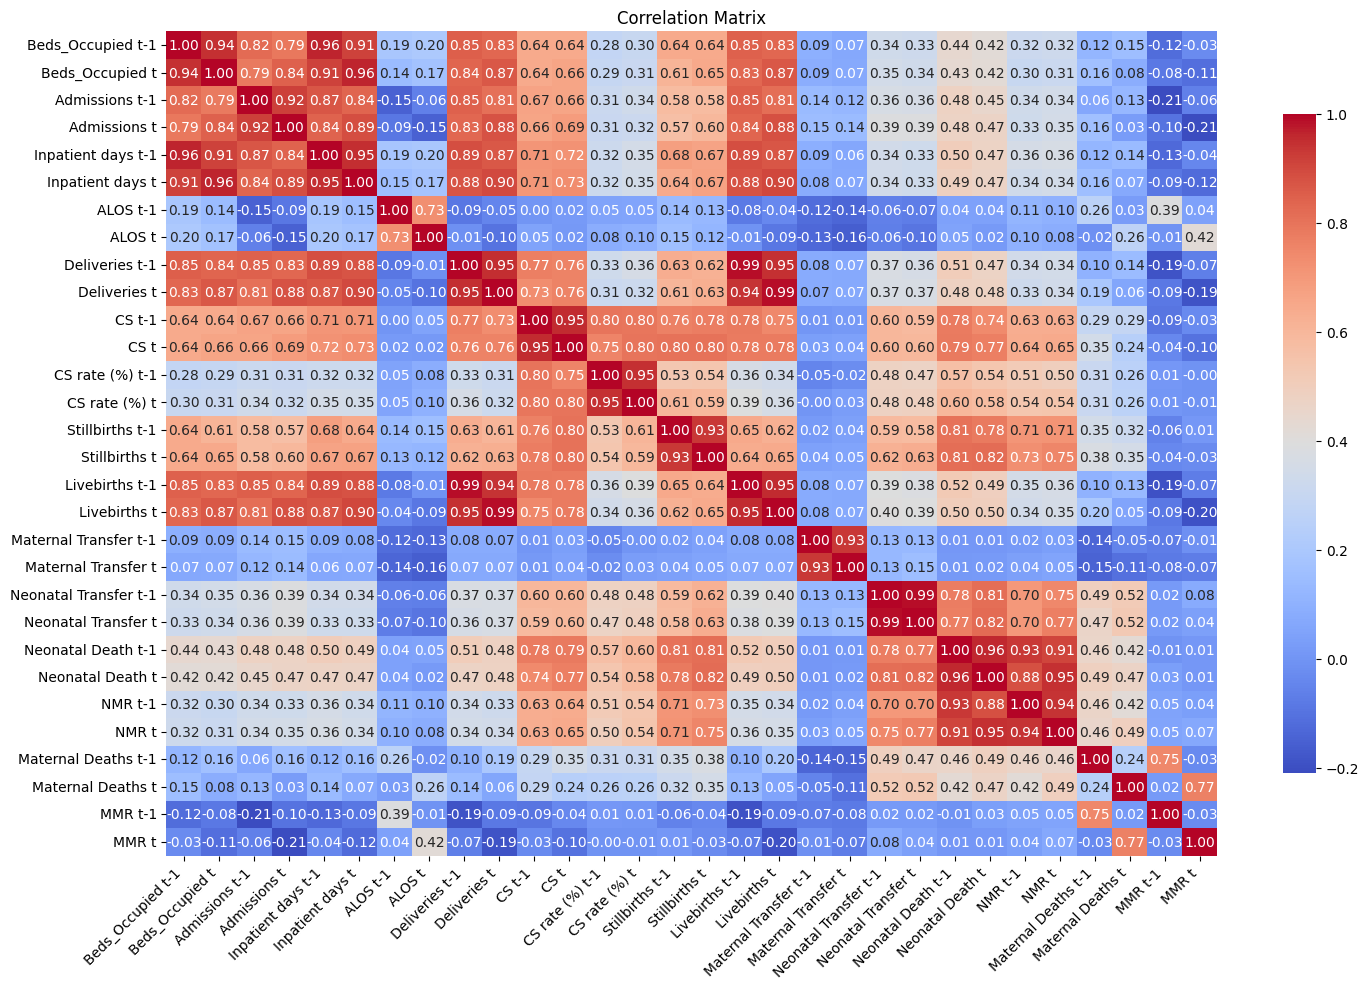

In [416]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of variables for which to plot the correlation matrix
variables = ['Beds_Occupied t-1', 'Beds_Occupied t', 'Admissions t-1', 'Admissions t', 'Inpatient days t-1', 'Inpatient days t', 'ALOS t-1', 'ALOS t', 'Deliveries t-1', 'Deliveries t', 'CS t-1', 'CS t', 'CS rate (%) t-1', 'CS rate (%) t', 'Stillbirths t-1', 'Stillbirths t', 'Livebirths t-1', 'Livebirths t', 'Maternal Transfer t-1', 'Maternal Transfer t', 'Neonatal Transfer t-1', 'Neonatal Transfer t', 'Neonatal Death t-1', 'Neonatal Death t', 'NMR t-1', 'NMR t', 'Maternal Deaths t-1', 'Maternal Deaths t', 'MMR t-1', 'MMR t']

# Compute the correlation matrix
corr_matrix = transformed_df[variables].corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"shrink": .8})

# Adjust the layout
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Correlation Matrix")
plt.tight_layout()

# Show the plot
plt.show()


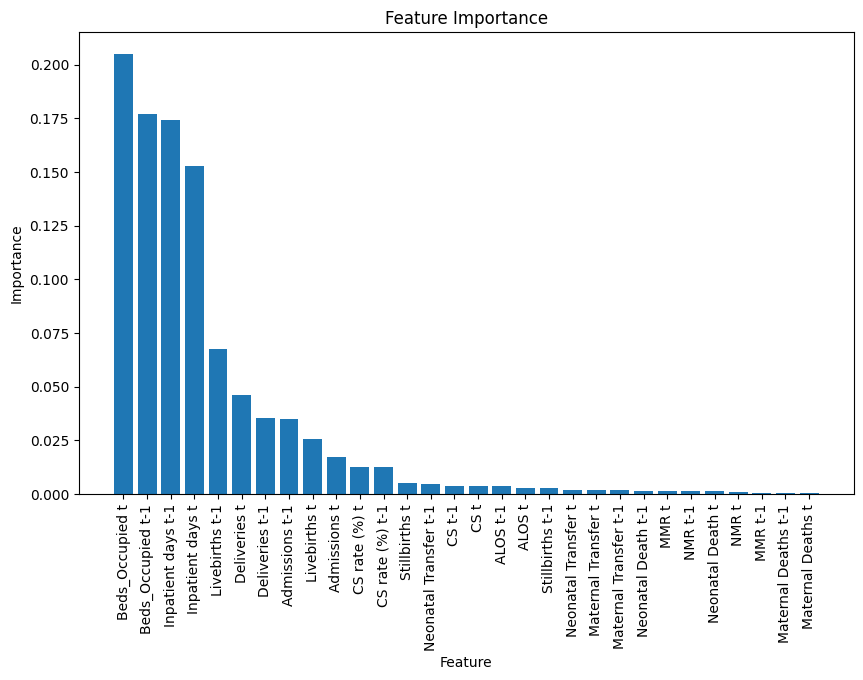

In [408]:
import matplotlib.pyplot as plt
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [predictor_variables[i] for i in indices]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [12]:

def find_prefix_years(df, prefixes):
    all_years = []
    common_years_set = None
    for prefix in prefixes:
        prefix_years = df.filter(like=prefix).columns.str.extract(r'\b(\d{4})\b').dropna().astype(int).squeeze().tolist()
        prefix_years_set = set(prefix_years)
        
        # Initialize the common_years_set with years from the first prefix
        if common_years_set is None:
            common_years_set = prefix_years_set
        else:
            # Check if the years match for subsequent prefixes
            if common_years_set != prefix_years_set:
                raise ValueError(f"Years for prefix '{prefix}' do not match the common set of years.")
        all_years.extend(prefix_years)
    all_years = sorted(set(all_years))
    return all_years

# Function to add a new column next to similar columns
def add_column_next_to(df, new_col_name, new_col_data):
    prefix = new_col_name.split(' ')[0]
    
    similar_cols = [col for col in df.columns if col.startswith(prefix)]
    if similar_cols:
        last_col_position = df.columns.get_loc(similar_cols[-1])
       
        df.insert(last_col_position + 1, new_col_name, new_col_data)
    else:
        df[new_col_name] = new_col_data

df_years = find_prefix_years(df, prefixes)
new_data = {
            'Beds_Occupied t-1': df[f'Beds_Occupied {df_years[-3]}'],
            'Beds_Occupied t': df[f'Beds_Occupied {df_years[-2]}'],
            'Admissions t-1': df[f'Admissions {df_years[-3]}'],
            'Admissions t': df[f'Admissions {df_years[-2]}'],

        }
        
new_df = pd.DataFrame(new_data)
# Make predictions for 2023 using data from 2021 and 2022
predictions_2023 = model.predict(new_df)

# Add predictions for 2023 to df_with_predictions
add_column_next_to(df, f"{target} {df_years[-1]} Model", predictions_2023)

new_data = {
    'Beds_Occupied t-1': df[f'Beds_Occupied {df_years[-2]}'],
    'Beds_Occupied t': df[f'Beds_Occupied {df_years[-1]}'],
    'Admissions t-1': df[f'Admissions {df_years[-2]}'],
    'Admissions t': df[f'Admissions {df_years[-1]}'],

}

new_df = pd.DataFrame(new_data)
# Make predictions for 2024 using data from 2022 and 2023
predictions_2024 = model.predict(new_df)

# Add predictions for 2024 to df_with_predictions
add_column_next_to(df, f"{target} {df_years[-1]+1} Model", predictions_2024)

In [21]:

df.iloc[:,-7:].sum(axis=0)

Beds_Occupied 2019              4683.221226
Beds_Occupied 2020              4175.049701
Beds_Occupied 2021              4625.307847
Beds_Occupied 2022              4721.154294
Beds_Occupied 2023              4931.671163
Beds_Occupied t+1 2023 Model    4795.548114
Beds_Occupied t+1 2024 Model    4752.652571
dtype: float64

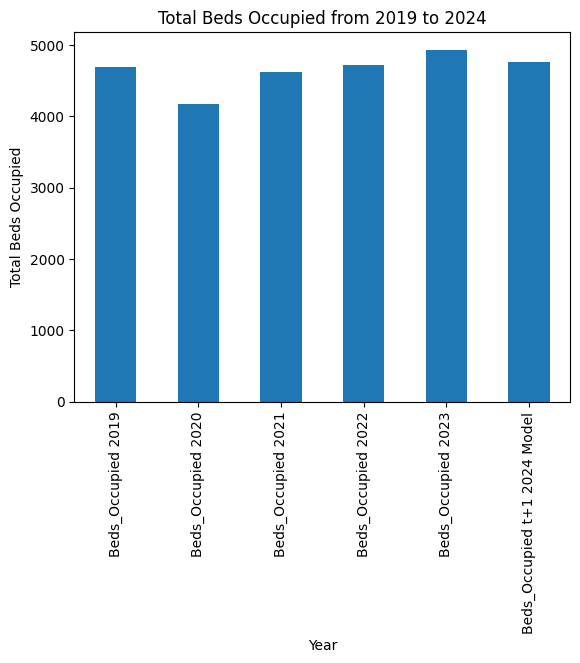

In [23]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Select columns for the years 2019 to 2024
columns_to_plot = [col for col in df.iloc[:,-7:].columns if '2019' in col or '2020' in col or '2021' in col 
                   or '2022' in col or '2023' in col or '2024' in col]

# Remove the 'Beds_Occupied t+1 2023 Model' column
columns_to_plot.remove('Beds_Occupied t+1 2023 Model')

# Now, df[columns_to_plot] contains only the columns we want to plot
# We'll sum across rows (axis=0) to get the total for each column
totals = df[columns_to_plot].sum(axis=0)

# Plot the data
totals.plot(kind='bar')  # or .plot() for a line plot
plt.title('Total Beds Occupied from 2019 to 2024')
plt.xlabel('Year')
plt.ylabel('Total Beds Occupied')
plt.show()


In [367]:
pd.concat([df.iloc[:, :2], df.iloc[:, -7:]], axis=1)

,Region,Name,Beds_Occupied 2019,Beds_Occupied 2020,Beds_Occupied 2021,Beds_Occupied 2022,Beds_Occupied 2023,Beds_Occupied t+1 2023 Model,Beds_Occupied t+1 2024 Model
0,National,Republican PC,122.385000,109.545000,116.265000,102.450000,114.678000,121.014118,110.837697
1,Andijan,Andijan RPC,192.080000,153.800000,183.800000,193.599000,206.850000,197.425450,195.532350
2,Andijan,Kurgantepa IDPC,83.620421,74.790474,82.348615,87.218370,88.010000,90.906405,90.377880
3,Andijan,Pakhtabad IDPC,92.911579,83.100526,91.498462,92.785500,127.468000,116.932539,117.827422
4,Andijan,Shakhrikhan IDPC,111.945897,100.574096,97.597500,75.157500,114.048000,109.487000,100.629327
5,Andijan,Andijan CMH #1,153.763500,135.283500,171.237000,162.409500,150.051000,159.400940,164.412497
6,Andijan,Andijan CMH #2,212.625000,158.634000,177.198000,201.537000,187.761000,192.384375,194.520250
7,Andijan,Andijan DH,46.618000,24.926000,37.961000,43.395000,104.258000,84.158364,87.721562
8,Andijan,Asaka DMH #1,94.515500,94.496500,84.236500,102.210500,93.556000,93.652561,95.473250
9,Andijan,Asaka DMH #2,87.831000,52.920000,90.153000,81.099000,81.234000,84.508210,86.190651


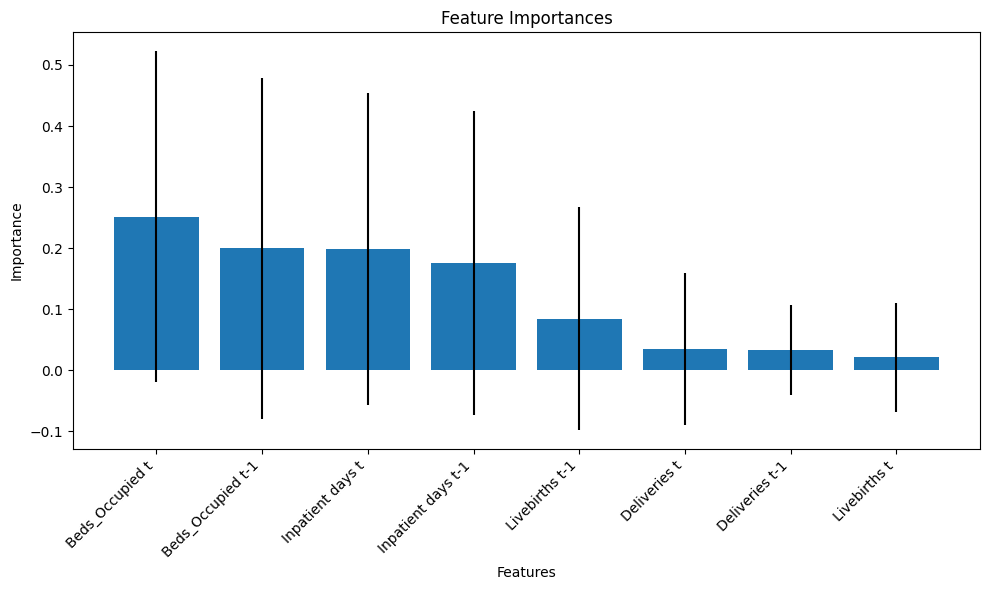

              Feature  Importance   Std Dev
1     Beds_Occupied t    0.251507  0.270875
0   Beds_Occupied t-1    0.199647  0.279181
3    Inpatient days t    0.198546  0.255371
2  Inpatient days t-1    0.175250  0.248666
4      Livebirths t-1    0.084840  0.182494
7        Deliveries t    0.034932  0.125009
6      Deliveries t-1    0.033402  0.073702
5        Livebirths t    0.021877  0.089198


In [315]:
# # Get feature importances
# import numpy as np
# import matplotlib.pyplot as plt
# importances = model.feature_importances_
# std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

# # Create a DataFrame for easier visualization
# feature_importances_df = pd.DataFrame({
#     'Feature': predictor_variables,
#     'Importance': importances,
#     'Std Dev': std
# }).sort_values('Importance', ascending=False)

# # Plotting feature importances
# plt.figure(figsize=(10,6))
# plt.bar(feature_importances_df['Feature'], feature_importances_df['Importance'], yerr=feature_importances_df['Std Dev'], align='center')
# plt.xlabel('Features')
# plt.ylabel('Importance')
# plt.title('Feature Importances')
# plt.xticks(rotation=45, ha="right")  # Rotate the x labels for better readability
# plt.tight_layout()  # Adjust the layout to fit the labels
# plt.show()

# # Print the feature importances
# print(feature_importances_df)

(49, 1)